# Worksheet 4: Confidence Intervals via Bootstrapping

#### Lecture and Tutorial Learning Goals:
From this section, students are expected to be able to:

1. Define what a confidence interval is and why we want to generate one.
2. Explain how the bootstrap sampling distribution can be used to create confidence intervals.
3. Write a computer script to calculate confidence intervals for a population parameter using bootstrapping.
4. Effectively visualize point estimates and confidence intervals.
5. Interpret and explain results from confidence intervals.
6. Discuss the potential limitations of these methods.

In [2]:
# Run this cell before continuing.
library(cowplot)
library(datateachr)
library(infer)
library(repr)
library(tidyverse)
source("tests_worksheet_04.R")


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Warning message:
“package ‘infer’ was built under R version 4.0.2”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::

## 1. Short Recap & Warm-Up

Before we start exploring the new material for this week, let's remind ourselves of some of the most important points that we covered in the previous week by answering a couple of questions.

**Question 1.0**
<br>{points: 1}

Consider the following diagram of some of the concepts that we have learned about so far:

```
population -> parameters
    sample -> point estimate -> estimates -> ...(1)
    sample -> ...(2) -> standard error
        bootstrap samples -> bootstrap distribution -> ...(3) -> sampling distribution
                             bootstrap distribution -> ...(4) -> estimates -> ...(5)
```
An arrow `->` indicates some type of relationship between the two conjoined terms. For example, `population -> parameters` could be interpretted as "a population has parameters", and `sample -> point estimate` could be interpretted as "from a sample, we can compute a point estimate".

Notice that some terms are missing, as indicated by the 5 `...`'s. Your job is to match the following terms with their appropriate locations in the diagram:

A. Standard deviation

B. Standard error

C. Estimator

D. Estimates

E. Parameter

Your answer should be a string containing the letters associated with the terms **in the same order as they would appear in the completed diagram:** `(1)(2)(3)(4)(5)`. Each letter must be used exactly once. For example, one potential solution is `"ABCDE"`.

_Assign your answer to an object called `answer1.0`. Your answer should be a string containing the letters "A", "B", "C", "D", and "E" in any order._

In [5]:
# answer1.0 <- ...

# your code here
answer1.0 <- "ABDCE"

In [6]:
test_1.0()

ERROR: Error: Test failed: 'Solution is incorrect'
* digest(tolower(answer1.0)) not equal to "aa817d77bfc37cf923b17fe3465952f0".
1/1 mismatches
x[1]: "e8eadb1c9d5f37b2080a4f25d37338f1"
y[1]: "aa817d77bfc37cf923b17fe3465952f0"


**Question 1.1**
<br>{points: 1}

Which statment below is **not** true?

A. Given a sample of size 100, we could get a useful estimate of the sampling distribution for samples of size 100 by taking many bootstrap samples of size 70 from the original sample.

B. As sample size increases, the standard deviation of the boostrap distribution resulting from a given sample generally decreases.

C. The standard deviation of a bootstrap distribution can provide a reliable estimate of the standard error of an estimator, even if the estimator's distribution is asymmetrical.

D. The procedure for drawing a normal sample and a bootstrap sample are very similar, with the exception of where we sample from, and the type of sampling (with vs. without replacement).

_Assign your answer to an object called `answer1.1`. Your answer should be a single character surrounded by quotes._

In [7]:
# answer1.1 <- ...

# your code here
answer1.1 <-"A"

In [8]:
test_1.1()

[1] "Success!"


## 2. Introduction to Confidence Intervals

So far, we have spent a lot of time understanding sampling distributions as well as one method used to estimate them (bootstrapping). But what's the point of sampling distributions in reality? We know that it tells us about **sampling variation**, which we quantify as the **standard error** of an estimator (the standard deviation of the estimator's distribution). But how are sampling distributions used in practice?
> We use a sampling distribution to give a range of plausible values for a population parameter. This range of values is known as a **confidence interval**.

In this section, we'll present the basic idea behind confidence intervals and the formal concepts that are used to define them.

### Vancouver Street Trees
Because we are introducing something brand new, let's revisit a dataset that we are familiar with: `vancouver_trees`. This time, we'll consider our population to be all of the public trees planted in Sunset. Our parameter of interest will be the mean of the `diameter` variable. In the cell below we have filtered the data frame for the population of interest and selected the variable that we need. We have also converted the diameter column from inches to centimetres.

In [9]:
# Run this cell before continuing.
sunset_pop <- 
    vancouver_trees %>% 
    filter(neighbourhood_name == "SUNSET") %>% 
    select(diameter) %>% 
    mutate(diameter = diameter * 2.54)

head(sunset_pop)

diameter
<dbl>
33.02
29.21
13.97
7.62
7.62
20.32


**Question 2.0** 
<br> {points: 1}

Calculate the mean of the population of interest.

_Assign your answer to an object called `pop_mean`. Your answer should be a single number._

In [10]:
# your code here
pop_mean <- sunset_pop %>% summarize(average=mean(diameter)) %>% as.numeric()

pop_mean

[1] 27.37626

In [11]:
test_2.0()

[1] "Success!"


In the cell below, we run code that generates 10 different bootstrap distributions. Each distribution estimates the sampling distribution of the mean of `sunset_pop` for samples of size 24. Hence, each bootstrap distribution was generated by taking a single sample of size 24 from the population `sunset_pop`, taking many resamples from this sample, and calculating the mean of each resample. We can consider the bootstrap distributions to depict some plausible values for the population parameter of interest, based on the original sample that was used to generate them.

_Use the 10 bootstrap distributions below to answer the **next question**._

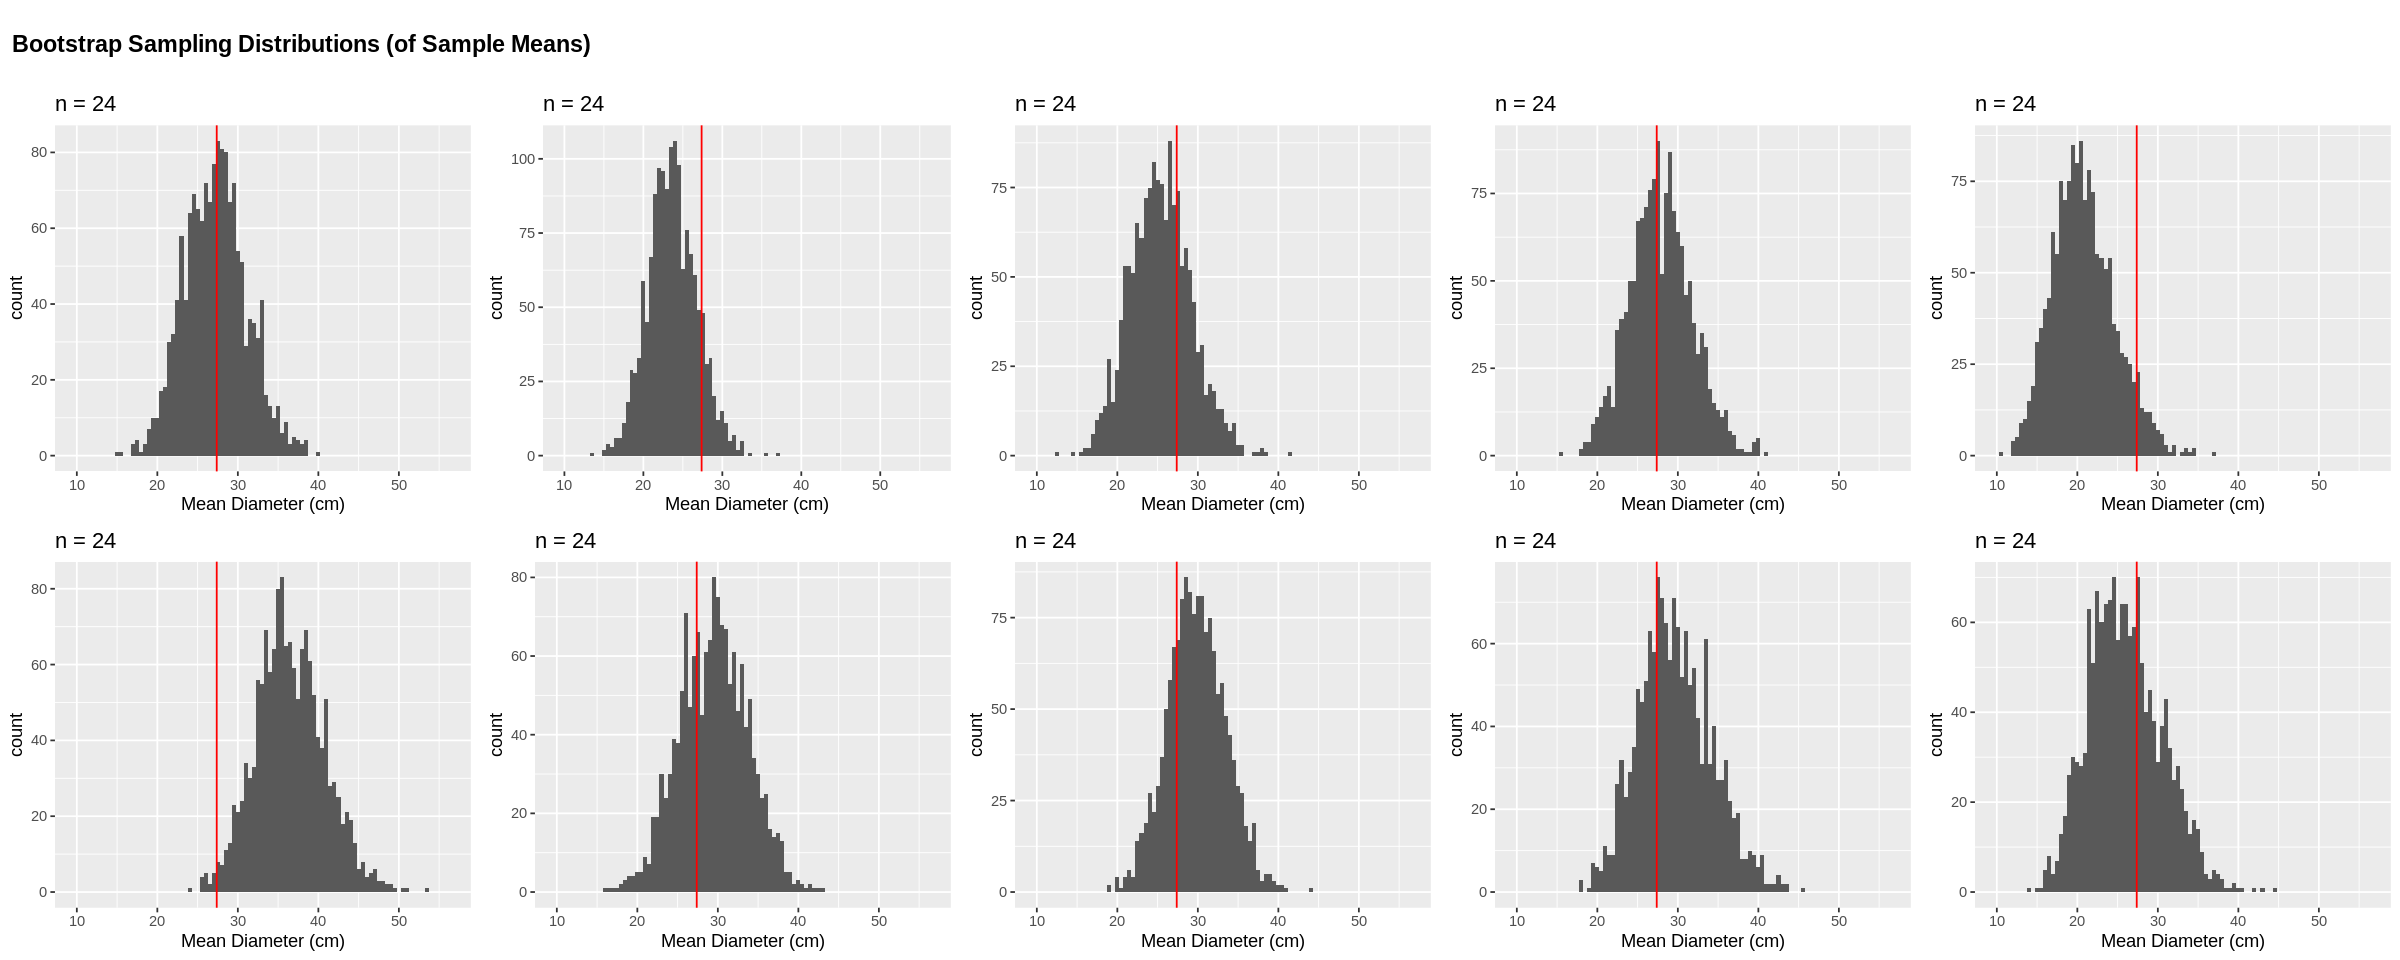

In [12]:
# Run this cell before continuing.
options(repr.plot.width = 20, repr.plot.height = 8)
source("bootstrap_dists_worksheet_04.R")
print(bootstrap_dists)

**Question 2.1**
<br>{points: 1}

How many of the bootstrap distributions **reasonably "cover"** the true mean of the population?

**Hint:** there may be more than one correct answer.

_Assign your answer to an object called `answer2.1`. Your answer should be a single integer._

In [13]:
# answer2.1 <- ...

# your code here
answer2.1 <- 7

In [14]:
test_2.1()

[1] "Success!"


### Quantiles
Is there a clear answer to the previous question? Not really... The meaning of "reasonably covers" may differ from person to person; where would you draw the line between "covers" and "does not cover"? To avoid relying on our own intuition, we need a more rigorous way to say whether or not a bootstrap distribution "covers" the parameter of interest. To do this, we will use **quantiles**. The general definition of quantiles that we will be using in this course is as follows:
> The $p$th quantile is the value of the observation data set where a proportion of $p$ fall below it, and $1 - p$ fall above it.

The $p$th quantile is also commonly referred to as the $p \times 100\%$th **percentile**. For example, the 0.025th quantile is also referred to as the 2.5th percentile. 

**Question 2.2**
<br>{points: 1}

Take a single sample of size 150 from `sunset_pop` using `rep_sample_n`. Be sure to `ungroup` and select only the variable that we are interested in (`diameter`). Use the scaffolding provided below as a guide:

```r
sample_1 <- 
    ... %>% 
    rep_sample_n(reps = ..., size = ..., replace = ...) %>% 
    ungroup() %>% 
    select(...)
```

_Assign your data frame to an object called `sample_1`._

In [15]:
set.seed(8622) # DO NOT CHANGE THIS!

# your code here

sample_1 <- sunset_pop %>% 
    rep_sample_n(size=150, replace = FALSE) %>%
    ungroup() %>%
    select(diameter)
head(sample_1)

diameter
<dbl>
7.62
57.15
40.64
7.62
7.62
43.18


In [16]:
test_2.2()

[1] "Success!"


**Question 2.3**
<br> {points: 1}

Calculate the 0.75th quantile of `sample_1` using R's `quantile` function. Use the scaffolding provided below as a guide:

```r
upper_quantile <- 
    sample_1 %>% 
    ...(...) %>% 
    quantile(...)
```

**Hints:**
1. `quantile` takes a numeric vector for the first argument
2. You can use the `pull` to get a single column from a data frame as a vector, for example, `pull(data_frame, column_name)`

_Assign your answer to an object called `upper_quantile`. Your answer should be a single number._

In [17]:
# your code here
upper_quantile <- sample_1 %>% 
    pull(diameter) %>% 
    quantile(0.75) 

upper_quantile

75% 
36.03625

In [18]:
test_2.2()

[1] "Success!"


**Question 2.4**
<br>{points: 1}

True or false?

One correct interpretation of the value of `upper_quantile` is: approximately 25% of observations in the sample `sample_1` lie above the value of `upper_quantile`.

_Assign your answer to an object called `answer2.4`. Your answer should be either "true" or "false", surrounded by quotes._

In [19]:
# answer2.4 <- ...

# your code here
answer2.4 <- "true"

In [20]:
test_2.4()

[1] "Success!"


**Question 2.5**
<br> {points: 1}

Calculate the 0.25th quantile of `sample_1` using R's `quantile` function.

_Assign your answer to an object called `lower_quantile`. Your answer should be a single number._

In [21]:
# your code here
lower_quantile <- sample_1 %>%
    pull(diameter) %>%
    quantile(0.25)

lower_quantile

25% 
7.77875

In [22]:
test_2.5()

[1] "Success!"


**Question 2.6**
<br> {points: 1}

Plot the distribution of the sample `sample_1` using `geom_histogram` with bin widths of 2. Additionally, add vertical lines on top of the histogram at the location of the 0.25th and 0.75th quantiles using `geom_vline`. Ensure your plot has descriptive, human-readable labels with units and a title. Use the scaffolding provided below as a guide:

```r
sample_quantile_plot <- 
    ... %>% 
    ggplot(aes(x = ...)) +
    theme_bw() +
    ...(binwidth = ..., color = 'white') +
    geom_vline(... = lower_quantile, colour = "red", size = 1) +
    ...(xintercept = upper_quantile, colour = "red", size = 1) +
    labs(title = "Sample Distribution (150 observations from population)",
         x = ...) + 
    theme(text = element_text(size = 20))

```

_Assign your plot to an object called `sample_quantile_plot`._

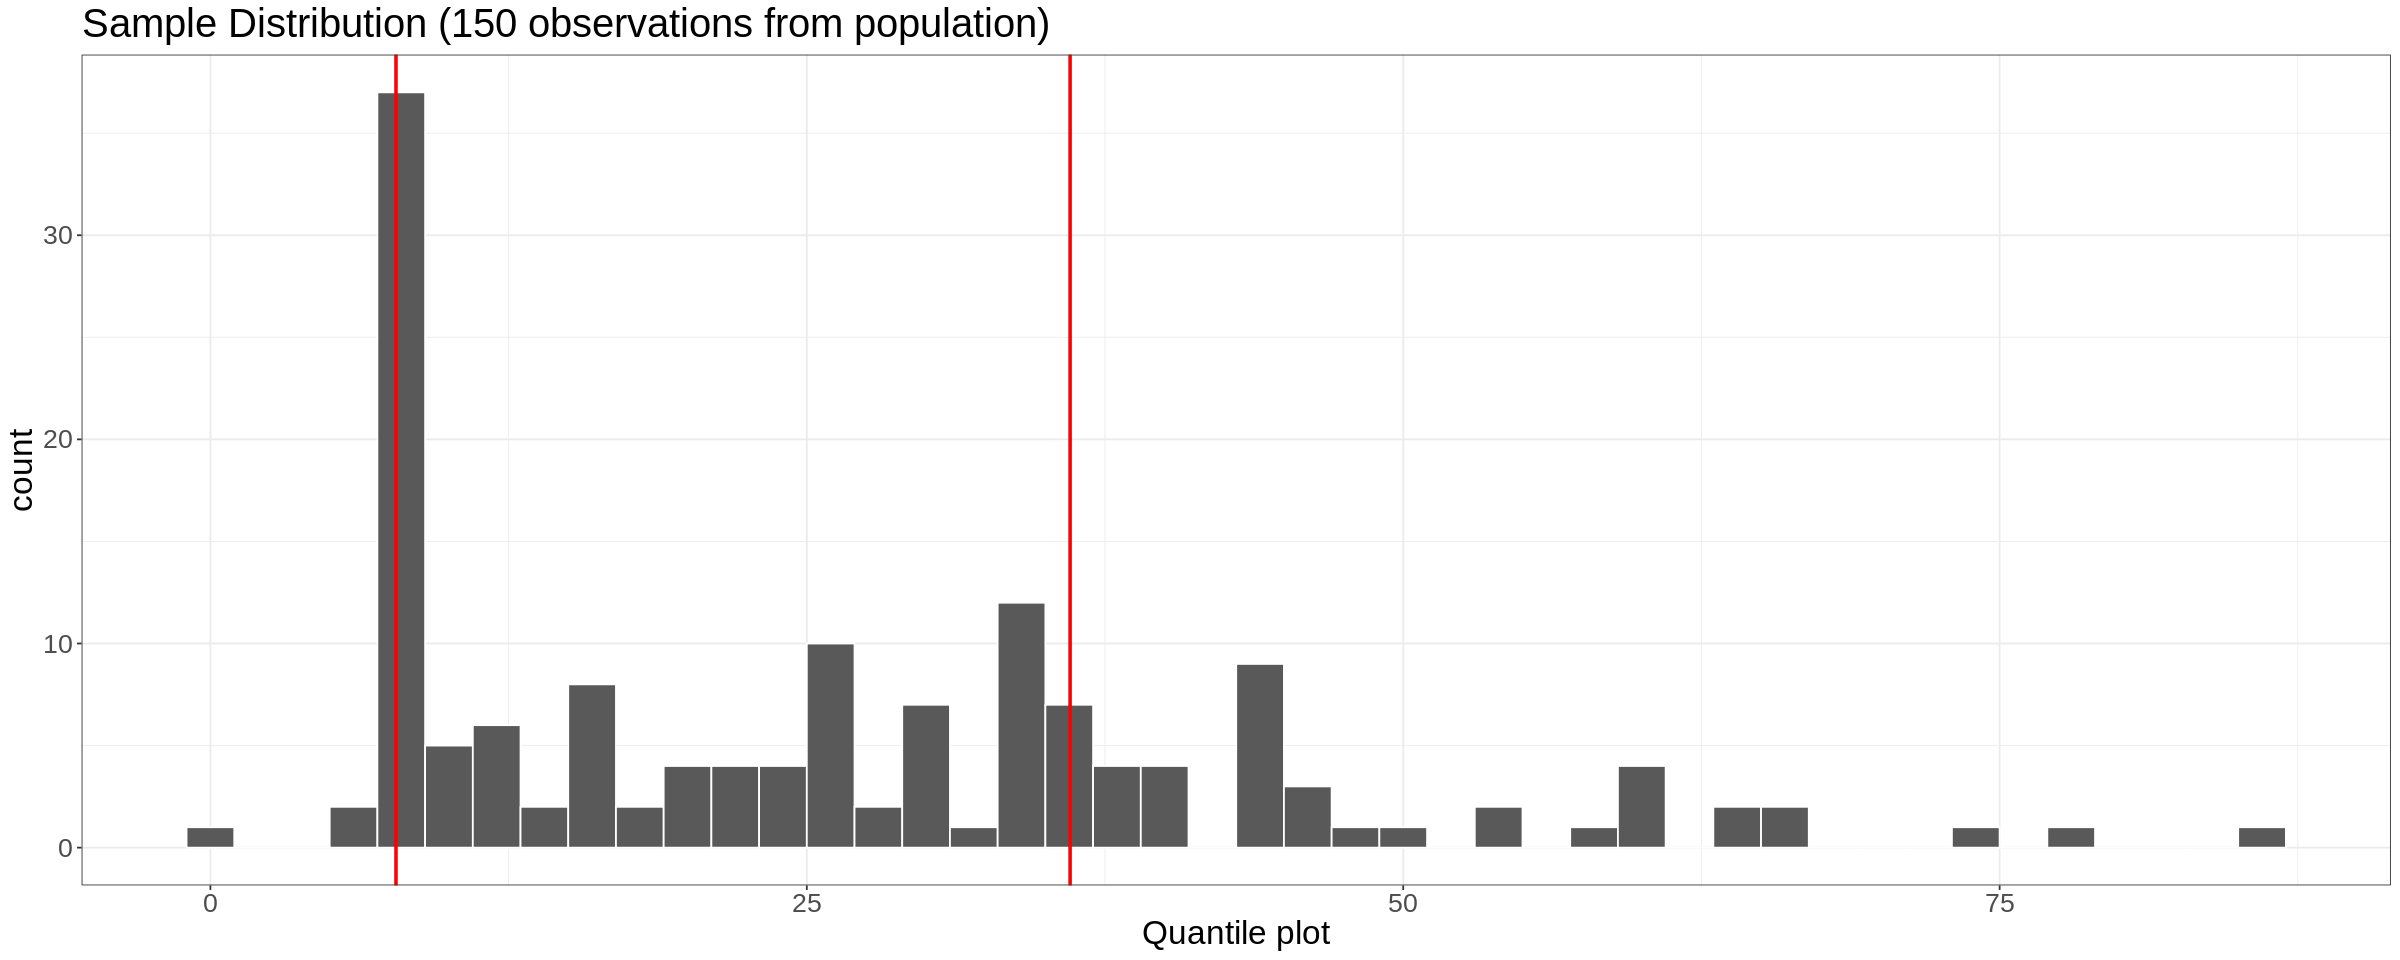

In [23]:
# your code here
sample_quantile_plot <- sample_1 %>%
    ggplot(aes(x=diameter)) +
    theme_bw() +
    geom_histogram(binwidth = 2, color = 'white') +
    geom_vline(xintercept = lower_quantile, colour = "red", size = 1) +
    geom_vline(xintercept = upper_quantile, colour = "red", size = 1) +
    labs(title = "Sample Distribution (150 observations from population)",
         x = 'Quantile plot') + 
    theme(text = element_text(size = 20))


sample_quantile_plot

In [24]:
test_2.6()

[1] "Success!"


**Question 2.7** 
<br> {points: 1}

Calculate the proportion of `sample_1` that falls **below** the 0.75th quantile you calculated earlier (`upper_quantile`). Use the scaffolding provided below as a guide:

```r
p_below <-
    sample_1 %>% 
    summarise(prop = mean(... < ...)) %>% 
    pull(...)
```

_Assign your answer to an object called `p_below`. Your answer should be a single number._

In [25]:
# your code here
p_below <- sample_1 %>%
    summarize(prop= mean(diameter < upper_quantile)) %>%
    pull(prop)
    

p_below

[1] 0.7466667

In [26]:
test_2.7()

[1] "Success!"


**Question 2.8** 
<br> {points: 1}

Calculate the proportion of `sample_1` that falls **between** the 0.25th and 0.75th quantiles that you calculated earlier (`lower_quantile` and `upper_quantile`, respectively).

**Hint:** one method of calculating the answer to this question is very similar to the method used in the previous question.

_Assign your answer to an object called `p_between`. Your answer should be a single number._

In [27]:
# your code here
p_between <- sample_1 %>%
    summarise(prop=mean(lower_quantile < diameter & diameter < upper_quantile)) %>%
    pull(prop)
    
p_between

[1] 0.4933333

In [28]:
test_2.8()

[1] "Success!"


**Question 2.9**
<br>{points: 1}

Assume that we are certain that the sample `sample_1` is unbiased and representative of the population (i.e. we can consider it to be a good estimate of the population). Which of the interpretation **of the interval** (`lower_quantile`, `upper_quantile`) between the two quantiles of the sample distribution is **incorrect**?

A. If we picked a random observation from the population, we can estimate that there is approximately a 50% chance that its diameter would fall within the interval (`lower_quantile`, `upper_quantile`).

B. Approximately 25% of the diameters of the observations in the sample fall above the value of `upper_quantile`.

C. If we draw another random sample and randomly picked an observation, there is approximately a 75% chance that its diameter would fall above the value of `lower_quantile`.

D. We can estimate that approximately 25% of the diameters of the observations in the population fall below the value of `lower_quantile`.

_Assign your answer to an object called `answer2.9`. Your answer should be a single character surrounded by quotes._

In [29]:
# answer2.9 <- ...

# your code here
answer2.9 <- "C"

In [30]:
test_2.9()

[1] "Success!"


**Question 2.10**
<br>{points: 1}

Like the previous question, assume that we are certain that the sample `sample_1` is unbiased and representative of the population (i.e. we can consider it to be a good estimate of the population). However, suppose that you calculated the 0.1th quantile for `lower_quantile` and the 0.6th quantile for `upper_quantile` for the sample, instead of the 0.25th and 0.75th quantiles as you did previously.

Given the above scenario, would the correctness of the following interpretation of the interval (`lower_quantile`, `upper_quantile`) remain **unchanged**?

> If we picked a random observation from the population, we can estimate that there is approximately a 50% chance that it would fall within the interval (`lower_quantile`, `upper_quantile`).

_Assign your answer to an object called `answer2.10`. Your answer should be either "true" or "false", surrounded by quotes._

In [31]:
# answer2.10 <- ...

# your code here
answer2.10 <- "true"

In [32]:
test_2.10()

[1] "Success!"


## 3. Formalizing Confidence Intervals

Now that we understand quantiles and how we can interpret them, we can rephrase the vague question of
> How many of the bootstrap distributions **reasonably "cover"** the true mean of the population?

that we encountered at the start of the previous section. Specifically, we could ask something like
> Does the interval between the 0.1th and 0.9th quantiles capture the true mean of the population?

instead, where the answer does not rely on one's intuition. That interval referenced in the question above is called a **confidence interval**, and in particular, it is called an **80% confidence interval**. One should think of a confidence interval as a **range of plausible** values for the population parameter, which may or may not fall within the interval. This is significantly different than a point estimate, which is a **single plausible value** for the population parameter. A popular analogy used to compare point estimates to confidence intervals is fishing with a spear vs. fishing with a net, respectively.

<br>

![](https://d33wubrfki0l68.cloudfront.net/45f6d2e16255dbcb42de86336e1e49ef732aa5da/8bcd0/images/shutterstock/point_estimate_vs_conf_int.png)
<div style="text-align: center"><i>Image from <a href="https://moderndive.com/8-confidence-intervals.html#ci-build-up">ModernDive (Figure 8.15)</i></a></div><br>
With a spear, we are aiming for a particular fish (a single value) and hoping to catch it, whereas with a net, we are aiming for a larger area in space (a range of plausible values) and hoping that the fish is captured in the net.

### Calculating & Visualizing a Single 90% Confidence Interval Using Bootstrapping
To get a clearer picture of how we can use quantiles and a bootstrap sampling distribution to calculate a confidence interval, let's calculate one from scratch. Specifically, we'll calculate a single 90% confidence interval for the mean of the `diameter` variable for the population `sunset_pop`. Afterwards, we'll visualize it and compare it to the true mean.
> As usual, it is important to note that we do not usually have access to the population parameter of interest; many of these questions are purely for your understanding of confidence intervals. 

**Question 3.0** 
<br> {points: 1}

Take a single random sample of size 30 from `sunset_pop` using `rep_sample_n` and a seed of 0120. Ensure the resulting data frame only has a single column: `diameter`. Use the scaffolding provided below as a guide:

```r
sample_2 <- 
    sunset_pop %>% 
    rep_sample_n(reps = ..., size = ..., replace = ...) %>% 
    ungroup() %>% 
    select(...)
```

**Note:** don't forget that `rep_sample_n` returns a grouped data frame.

_Assign your data frame to an object called `sample_2`._

In [33]:
set.seed(0120) # DO NOT CHANGE!

# your code here
sample_2 <- 
    sunset_pop %>% 
    rep_sample_n(reps = 1, size = 30, replace = FALSE) %>% 
    ungroup() %>% 
    select(diameter)
head(sample_2)

diameter
<dbl>
7.62
41.91
66.04
39.37
7.62
38.10


In [34]:
test_3.0()

[1] "Success!"


**Question 3.1** 
<br> {points: 1}

Generate a bootstrap distribution of sample means from `sample_2` by re-sampling with replacement 1000 times using `rep_sample_n` and a seed of 5127. Then, calculate the mean of each bootstrap sample. Name the new column containing the bootstrap sample means `mean_diameter`, and select only that column. Use the scaffolding provided below as a guide:
```r
bootstrap_dist <- 
    sample_2 %>% 
    rep_sample_n(reps = ..., size = ..., replace = ...) %>% 
    group_by(...) %>% 
    ...(mean_diameter = ...(diameter)) %>% 
    select(mean_diameter)
```

_Assign your data frame to an object called `bootstrap_dist`._

In [35]:
set.seed(5127) # DO NOT CHANGE!

# your code here
bootstrap_dist <- 
    sample_2 %>% 
    rep_sample_n(reps = 1000, size = 30, replace = TRUE) %>% 
    group_by(replicate) %>% 
    summarise(mean_diameter = mean(diameter)) %>% 
    select(mean_diameter)
head(bootstrap_dist)

`summarise()` ungrouping output (override with `.groups` argument)



mean_diameter
<dbl>
31.26317
24.15117
31.60183
20.82800
19.64267
26.52183


In [36]:
test_3.1()

[1] "Success!"


**Question 3.2** 
<br> {points: 1}

Calculate the 5th and 95th percentiles of `bootstrap_dist` using the `quantile` and `summarize` functions. Name the column containing the 5th percentile `ci_lower` and the column containing the 95th percentile `ci_upper`. Use the scaffolding provided below as a guide:

```r
ci <- 
    bootstrap_dist %>% 
    ...(ci_lower = quantile(..., 0.05),
              ci_upper = ...(mean_diameter, ...))
```

_Assign your data frame to an object called `ci`._

In [37]:
# your code here
ci <- 
    bootstrap_dist %>% 
    summarize(ci_lower = quantile(mean_diameter, 0.05),
              ci_upper = quantile(mean_diameter, 0.95))
head(ci)

ci_lower,ci_upper
<dbl>,<dbl>
20.828,32.28128


In [38]:
test_3.2()

[1] "Success!"


**Question 3.3**
<br> {points: 1}

Plot the confidence interval (represented by a transluscent rectangle) and true mean of the population (represented by a vertical line, generated by `geom_vline`) over the bootstrap distribution `sample_2s` (visualized as a histogram with bin widths of 1, generated by `geom_histogram`). Use the scaffolding provided below as a guide:

```r
ci_plot <- 
    ... %>% 
    ggplot(aes(x = ...)) +
    ...(binwidth = ..., colour = "white", fill = "grey") +
    annotate("rect", xmin = ci$ci_lower, xmax = ci$ci_upper, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    geom_vline(xintercept = pop_mean,
               size = 2,
               colour = "red") +
    labs(title = "Bootstrap distribution with 90% confidence interval",
         x = "Mean tree diameter (cm)") +
    theme_bw() # Sets a theme for better visibility
```

**Note:** recall that you already calculated the true mean of the population in the and saved it to an object named `pop_mean`. 

_Assign your plot to an object called `ci_plot`._

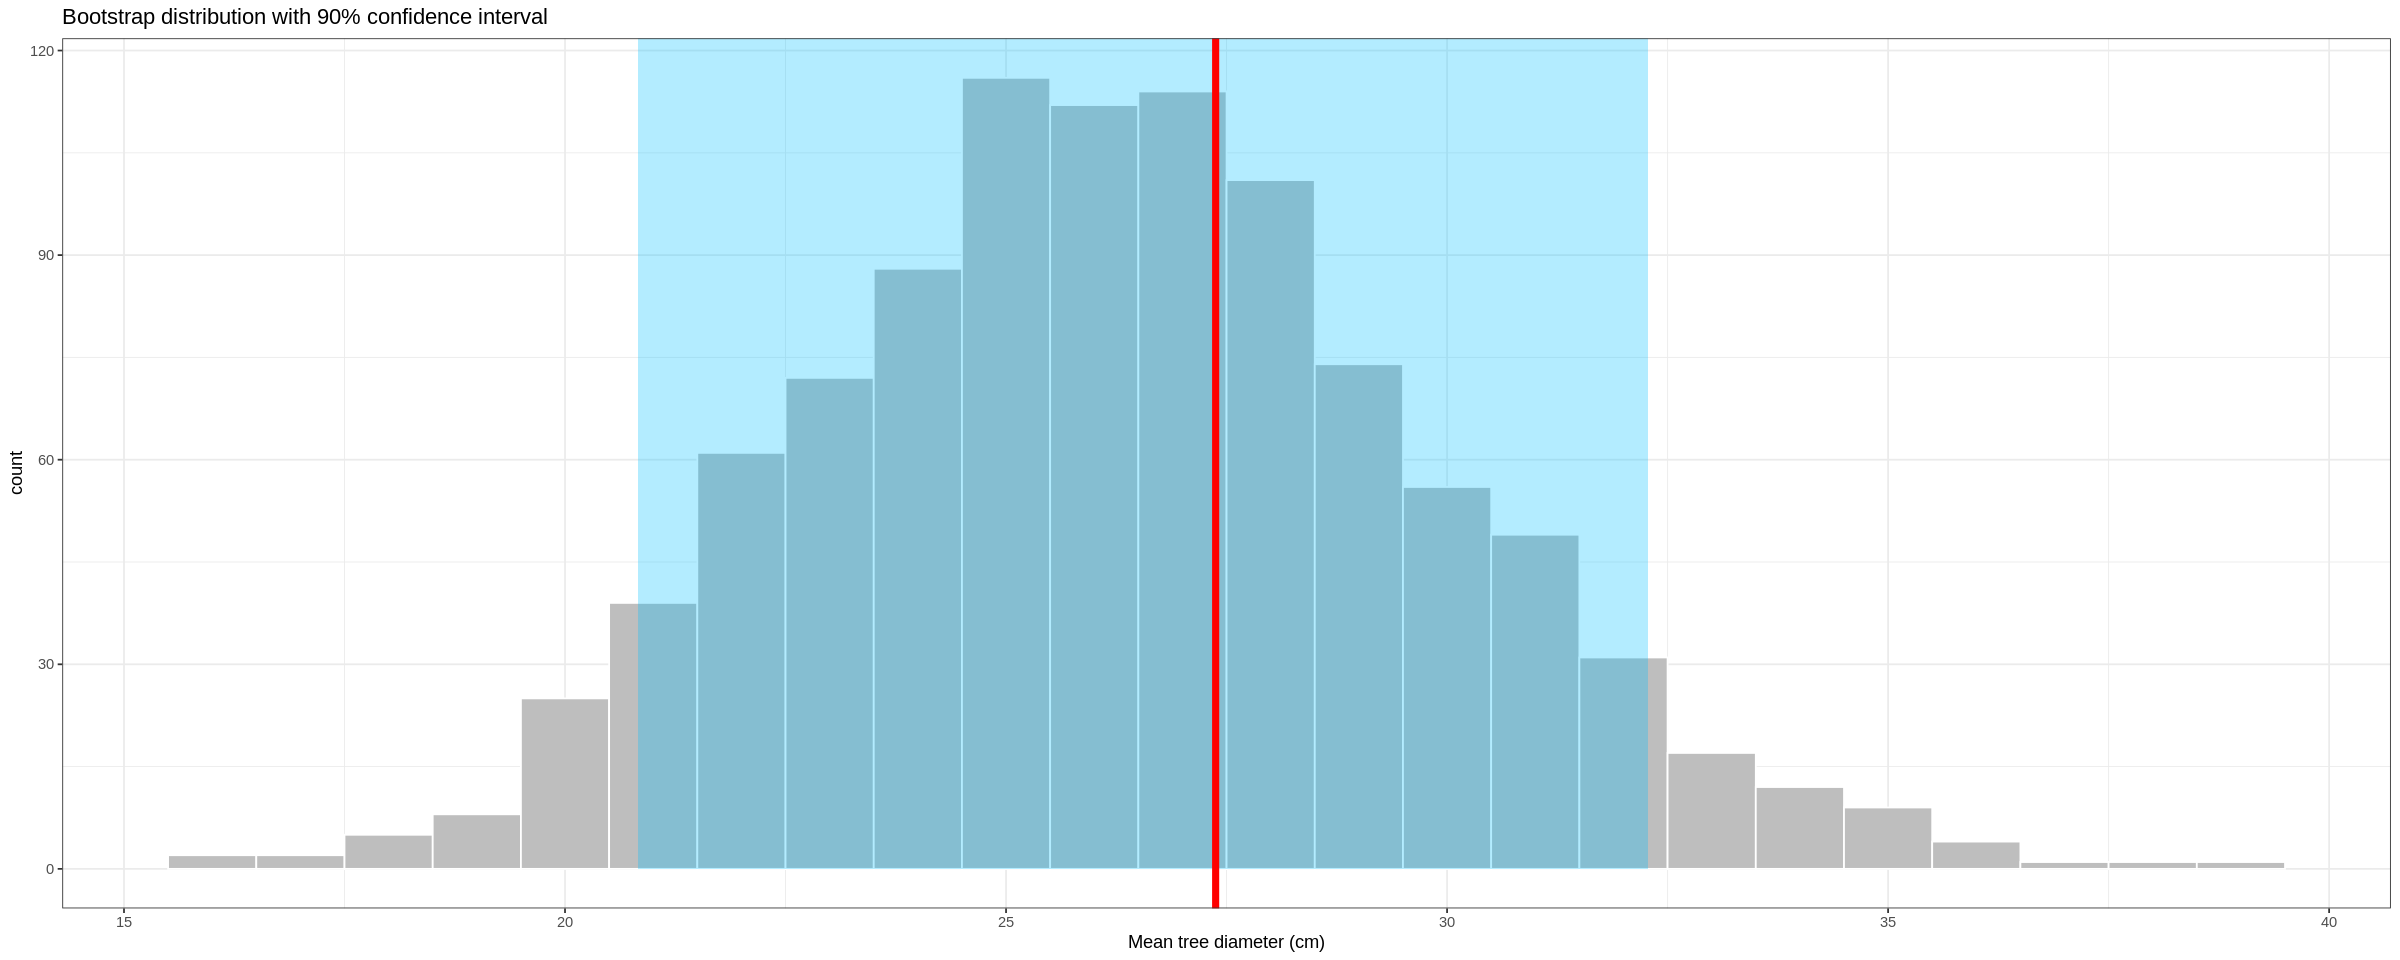

In [39]:
# your code here
ci_plot <- 
    bootstrap_dist %>% 
    ggplot(aes(x = mean_diameter)) +
    geom_histogram(binwidth = 1, colour = "white", fill = "grey") +
    annotate("rect", xmin = ci$ci_lower, xmax = ci$ci_upper, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    geom_vline(xintercept = pop_mean,
               size = 2,
               colour = "red") +
    labs(title = "Bootstrap distribution with 90% confidence interval",
         x = "Mean tree diameter (cm)") +
    theme_bw() # Sets a theme for better visibility
ci_plot

In [40]:
test_3.3()

[1] "Success!"


**Question 3.4**
<br>{points: 1}

True or false?

The parameter of interest (the mean diameter of public street trees located in sunset) is captured by the confidence interval that we calculated in **question 3.2** and visualized above.

_Assign your answer to an object called `answer3.4`. Your answer should be either "true" or "false", surrounded by quotes._

In [41]:
# answer3.4 <- ...

# your code here
answer3.4 <- "true"

In [42]:
test_3.4()

[1] "Success!"


### Calculating & Visualizing Many 90% Confidence Intervals Using Bootstrapping
How can we interpret a confidence interval when we don't have access to the population parameter (i.e. in reality)? Does our interpretation change as the width of the interval changes? How could we choose the width in the first place? To answer these questions, we're going to produce 100 different 90% confidence intervals to see how they behave. The bulk of the work has already been done for you in the cell below. We took 100 samples of size 30 and used each one to produce an estimate of the sampling distribution using bootstrapping with 1000 repetitions, essentially repeating the procedure you followed at the start of this section 100 times over.

In [43]:
# Run this cell before continuing.
sampling_dist_estimates <- read_csv("sampling_dist_estimates.csv")
bootstrap_samples <- read_csv("bootstrap_samples.csv")

Parsed with column specification:
cols(
  sample_id = col_double(),
  replicate = col_double(),
  bootstrap_mean = col_double()
)

Parsed with column specification:
cols(
  sample_id = col_double(),
  replicate = col_double(),
  diameter = col_double()
)



However, here are a few questions to check your understanding of what went on behind the scenes.

_Use the following information to answer the **next 3 questions**._

Consider the following two data frames:
1. `sampling_dist_estimates`: contains 100 estimates of the sampling distribution as 100 different tibbles within the column `bootstrap_mean`. The `sample_id` column ranges from 1 to 100 (since we took 100 samples)
2. `bootstrap_samples`: a bootstrap data frame, where `sample_id == 1` for all rows

In [44]:
print(sampling_dist_estimates)
print(bootstrap_samples)

# A tibble: 100,000 x 3
   sample_id replicate bootstrap_mean
       <dbl>     <dbl>          <dbl>
 1         1         1           37.6
 2         1         2           36.8
 3         1         3           30.6
 4         1         4           33.4
 5         1         5           26.2
 6         1         6           31.1
 7         1         7           28.7
 8         1         8           28.3
 9         1         9           31.2
10         1        10           32.5
# … with 99,990 more rows
# A tibble: 30,000 x 3
   sample_id replicate diameter
       <dbl>     <dbl>    <dbl>
 1         1         1    10.2 
 2         1         1     7.62
 3         1         1    27.9 
 4         1         1    33.0 
 5         1         1     7.62
 6         1         1     7.62
 7         1         1    45.7 
 8         1         1    45.7 
 9         1         1    33.0 
10         1         1    33.0 
# … with 29,990 more rows


**Question 3.5**
<br>{points: 1}

True or false?

`bootstrap_samples` contains all of the bootstrap samples that were used to calculate the `bootstrap_mean` variable in `sampling_dist_estimates` for all of the 100 original samples.

_Assign your answer to an object called `answer3.5`. Your answer should be either "true" or "false", surrounded by quotes._

In [45]:
# answer3.5 <- ...

# your code here
answer3.5 <- "false"

In [46]:
test_3.5()

[1] "Success!"


**Question 3.6**
<br>{points: 1}

True or false?

Given **only** the `sampling_dist_estimates` data frame, we could produce `bootstrap_samples` data frame.

_Assign your answer to an object called `answer3.6`. Your answer should be either "true" or "false", surrounded by quotes._

In [47]:
# answer3.6 <- ...

# your code here
answer3.6 <- "false"

In [48]:
test_3.6()

[1] "Success!"


**Question 3.7** 
<br> {points: 1}

Use `bootstrap_samples` to re-create the bootstrap distribution from `sampling_dist_estimates` that was generated using `sample_id == 1`. Your resulting data frame should have two columns: `replicate` and `bootstrap_mean`.

_Assign your data frame to an object called `sampling_dist_estimate`._

In [55]:
# your code here
sampling_dist_estimate <- bootstrap_samples %>%
    select(diameter) %>%
    rep_sample_n(size= 30000, reps = 100, replace=TRUE) %>%
    group_by(replicate) %>%
    summarize(bootstrap_mean = mean(diameter))
print(sampling_dist_estimate)

`summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 100 x 2
   replicate bootstrap_mean
       <int>          <dbl>
 1         1           33.2
 2         2           33.4
 3         3           33.3
 4         4           33.4
 5         5           33.6
 6         6           33.3
 7         7           33.4
 8         8           33.2
 9         9           33.4
10        10           33.4
# … with 90 more rows


In [56]:
test_3.7()

ERROR: Error: Test failed: 'Data frame does not contain the correct number of rows'
* digest(as.integer(nrow(sampling_dist_estimate))) not equal to "b6a6227038bf9be67533a45a6511cc7e".
1/1 mismatches
x[1]: "5d6e7fe43b3b73e5fd2961d5162486fa"
y[1]: "b6a6227038bf9be67533a45a6511cc7e"


**Question 3.8** 
<br> {points: 1}

Now that we understand where `sampling_dist_estimates` came from, calculate a 90% confidence interval from each bootstrap distribution using the 0.05th and 0.95th quantiles. Use the scaffolding provided below as a guide:

```r
intervals <- 
    sampling_dist_estimates %>% 
    ...(...) %>% 
    summarize(ci_lower = ...(bootstrap_mean, ...),
              ci_upper = ...(..., ...))
```

**Hint:** The procedure is very similar to **question 3.2**, but with one extra step.

_Assign your data frame to an object called `intervals`._

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer

print(intervals)

In [ ]:
test_3.8()

**Question 3.9** 
<br> {points: 1}

Add a variable named `captured` to `intervals` that indicates whether the confidence interval described in that row captures the true mean (`pop_mean`). If the true mean is captured, `captured` should be `TRUE`, otherwise it should be `FALSE`. Use the scaffolding provided below as a guide:

```r
intervals_captured <- 
    intervals %>% 
    mutate(captured = (ci_lower <= ... & pop_mean <= ...))
```

_Assign your answer to an object called `intervals_captured`. Your answer should be a single number._

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer
head(intervals_captured)

In [ ]:
test_3.9()

**Question 3.10**
<br> {points: 1}

Visualize all 100 confidence intervals. Each interval is represented by a horizontal line (`geom_segment`) and is coloured depending on whether it captures the true mean of the population, which is represented as a vertical line (`geom_vline`). The ID of the sample should be on the y-axis. Use the scaffolding provided below as a guide:

```r
many_ci_plot <- 
    ... %>%
    ggplot() +
    scale_colour_manual(breaks = c("TRUE", "FALSE"), # Change colour scale for better visibility.
                        values = c("grey", "black")) +
    ...(aes(x = ...,
                     xend = ...,
                     y = sample_id,
                     yend = sample_id,
                     colour = ...)) +
    ...(xintercept = ..., colour = "red", size = 1) +
    labs(title = "100 90% Confidence Intervals",
         y = "Sample ID",
         x = "Diameter (cm)",
         colour = "Captured?") +
    theme_bw() # Sets a theme for better visibility.
```

_Assign your plot to an object called `many_ci_plot`._

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 6)

# your code here
fail() # No Answer - remove if you provide an answer

many_ci_plot

In [ ]:
test_3.10()

**Question 3.11**
<br>{points: 1}

Using the plot above, how many of the 100 confidence intervals "capture" the true mean of the population?

_Assign your answer to an object called `answer3.11`. Your answer should be a single integer._

In [63]:
# answer3.11 <- ...

# your code here
answer3.11 <-

In [64]:
test_3.11()

ERROR: Error: Test failed: 'Solution is incorrect'
* digest(as.integer(answer_as_numeric)) not equal to "e444a32cd8c806b12b8baff9696a342f".
1/1 mismatches
x[1]: "234a2a5581872457b9fe1187d1616b13"
y[1]: "e444a32cd8c806b12b8baff9696a342f"


**Question 3.12**
<br>{points: 1}

If we repeated the above experiment, but with 1000 different 90% confidence intervals instead of 100, how many of the intervals would you **expect** to capture the true mean of the population?

_Assign your answer to an object called `answer3.12`. Your answer should be a single integer._

In [ ]:
# answer3.12 <- ...

# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
test_3.12()

**Question 3.13**
<br>{points: 1}

Suppose you **did not** have data for the entire population of public street trees in Sunset. Consider a single **90% confidence interval** that you calculated using by bootstrapping a single sample of size $n$.

True or false?

We can interpret the confidence interval as: we are 90% confident that the true mean is captured by the interval. Or, in other words, across all 90% confidence intervals that could be calculated for the mean of the population of interest, we can expect that 90% of the intervals contain the true mean. 

_Assign your answer to an object called `answer3.13`. Your answer should be either "true" or "false", surrounded by quotes._

In [65]:
# answer3.13 <- ...

# your code here
answer3.13 <- "true"

In [66]:
test_3.13()

[1] "Success!"


## 4. Conclusion
Here are a few more questions that target some of the nuances related to confidence intervals.

**Question 4.0**
<br>{points: 1}

Suppose you **did not** have access to data for the entire population of public street trees in Sunset. Assume you took a single sample of size 75 and used bootstrapping to calculate a 95% confidence interval for the **standard deviation** of the diameter of the population, which turned out to be
> (12.52cm, 22.33cm)

True or false?

There is a 95% chance that the true standard deviation of the diameter of the population of public street trees in Sunset will fall within this interval.

_Assign your answer to an object called `answer4.0`. Your answer should be either "true" or "false", surrounded by quotes._

In [69]:
# answer4.0 <- ...

# your code here
answer4.0 <- "false"

In [70]:
test_4.0()

[1] "Success!"


**Question 4.1**
<br>{points: 1}

Suppose you were interested in calculating a 90% confidence interval for the **true proportion** of UBC students who lived on campus during their first year. Which of the following can be considered as "random"?

A. The true proportion of the population of interest.

B. The lower bound of a 99% confidence interval for the proportion of the population of interest.

C. The upper bound of a 99% confidence interval for the proportion of the population of interest.

D. A confidence interval of (0.44, 0.82) that you calculated by taking a sample of size 50 from the population of UBC students.

E. All of the above.

F. Only A, B, and C.

G. Only B, C, and D.

H. Only A and D.

I. Only B and C.

_Assign your answer to an object called `answer4.1`. Your answer should be a single character surrounded by quotes._

In [87]:
# answer4.1 <- ...

# your code hee
answer4.1 <- "I"

In [88]:
test_4.1()

[1] "Success!"


**Question 4.2**
<br>{points: 1}

Suppose you calculated two 50% confidence intervals for the mean of the number of years that it takes a UBC student to complete their undergraduate degree using bootstrapping. For the first confidence interval, you used the 0.1th and 0.6th quantiles, and for the second, you used the 0.25th and 0.75th quantiles.

True or false?

Both confidence intervals are valid **and** they can be interpretted in the same way.

_Assign your answer to an object called `answer4.2`. Your answer should be either "true" or "false", surrounded by quotes._

In [89]:
# answer4.2 <- ...

# your code here
answer4.2 <-"true"

In [90]:
test_4.2()

[1] "Success!"


**Question 4.3**
<br>{points: 1}

Consider the following (**impossible**) scenario:

> Congratulations! You've just made a statistical breakthrough and found a way to access the true sampling distribution for any population using only a single sample! There is no need for bootstrapping anymore, as you can determine the true sampling distribution directly.
> 
> However, you're still unable to work out the population parameter you are interested in. So, you decide to use the 0.1th and 0.9th quantiles of true sampling distribution to formulate a confidence interval for the population parameter.

What confidence level is **most likely** to be associated with this confidence interval that you calculated in the scenario above?

A. 0%

B. 50%

C. 80%

D. 100%

_Assign your answer to an object called `answer4.3`. Your answer should be a single character surrounded by quotes._

In [97]:
# answer4.3 <- ...

# your code here
answer4.3 <- "D"

In [98]:
test_4.3()

[1] "Success!"
